In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [78]:
df = pd.read_csv('lending_club_info.csv')

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

<Axes: xlabel='loan_status', ylabel='count'>

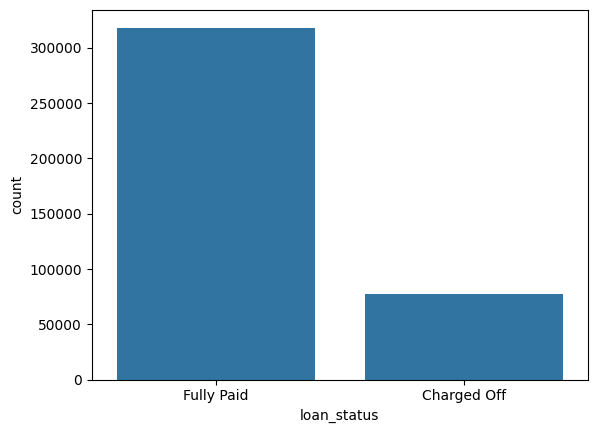

In [80]:
sns.countplot(x='loan_status', data=df) 

<Figure size 1200x600 with 0 Axes>

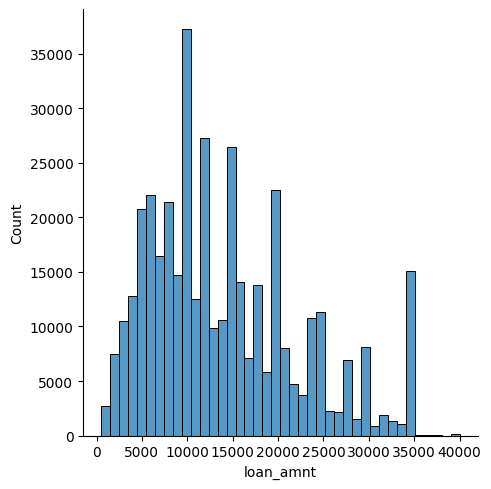

In [81]:
plt.figure(figsize=(12,6))
sns.displot(df['loan_amnt'], kde=False, bins=40)

<Axes: xlabel='installment', ylabel='loan_amnt'>

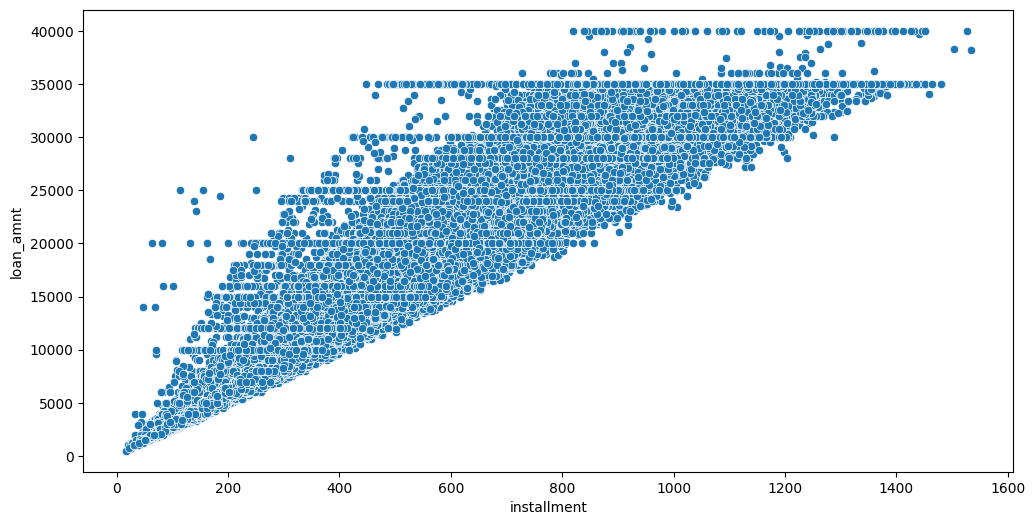

In [82]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='installment', y='loan_amnt', data=df)

In [ ]:
sns.boxplot(x='loan_status', y='loan_amnt', data=df)

In [41]:
df.groupby('loan_status')['loan_amnt'].describe() # mean loan amount for each loan status

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


In [42]:
df['grade'].unique() 

array(['B', 'A', 'C', 'E', 'D', 'F', 'G'], dtype=object)

In [ ]:
df['sub_grade'].unique()

array(['B4', 'B5', 'B3', 'A2', 'C5', 'C3', 'A1', 'B2', 'C1', 'A5', 'E4',
       'A4', 'A3', 'D1', 'C2', 'B1', 'D3', 'D5', 'D2', 'E1', 'E2', 'E5',
       'F4', 'E3', 'D4', 'G1', 'F5', 'G2', 'C4', 'F1', 'F3', 'G5', 'G4',
       'F2', 'G3'], dtype=object)

<Axes: xlabel='grade', ylabel='count'>

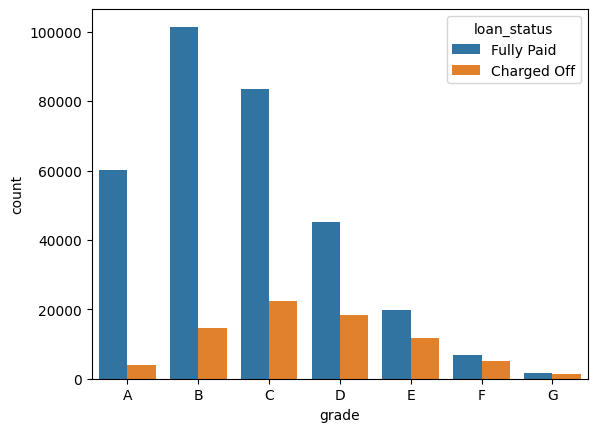

In [44]:
sns.countplot(x='grade', data=df, hue='loan_status', order=sorted(df['grade'].unique()))

C:\Users\higor\AppData\Local\Temp\ipykernel_18648\3882863123.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sub_grade', data=df, order=sorted(df['sub_grade'].unique()), palette='coolwarm')


<Axes: xlabel='sub_grade', ylabel='count'>

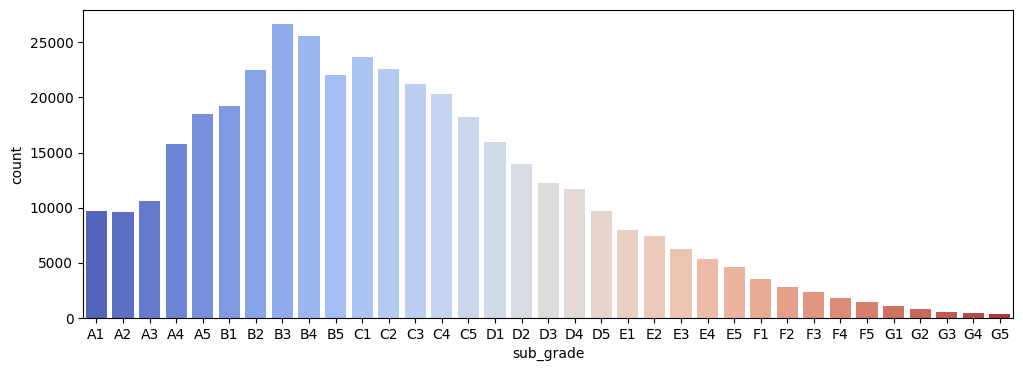

In [45]:
plt.figure(figsize=(12,4))
sns.countplot(x='sub_grade', data=df, order=sorted(df['sub_grade'].unique()), palette='coolwarm')
# It looks like F and G subgrades don't get paid back that often. Isloate those and recreate the countplot just for those subgrades.

<Axes: xlabel='sub_grade', ylabel='count'>

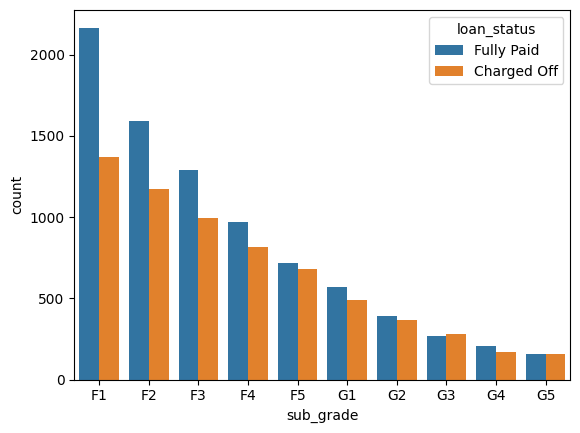

In [46]:
f_and_g = df[(df['grade']=='F') | (df['grade']=='G')]
sns.countplot(x='sub_grade', data=f_and_g, order=sorted(f_and_g['sub_grade'].unique()), hue='loan_status')

In [ ]:
df.isnull().sum() # check for missing values

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1756
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

In [48]:
100* df.isnull().sum()/len(df) # check for missing values in percentage

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443401
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
dtype: float64

In [ ]:
df['emp_title'].nunique() # check for unique values, there are 173105 unique job titles

173105

In [50]:
# emp_title is a job title description and it has too many unique values, so we can drop it
df = df.drop('emp_title', axis=1)

In [ ]:
sorted(df['emp_length'].dropna().unique()) # check for unique values in emp_length

['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year']

In [52]:
emp_length_order = ['< 1 year',
 '1 year',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '10+ years']

<Axes: xlabel='emp_length', ylabel='count'>

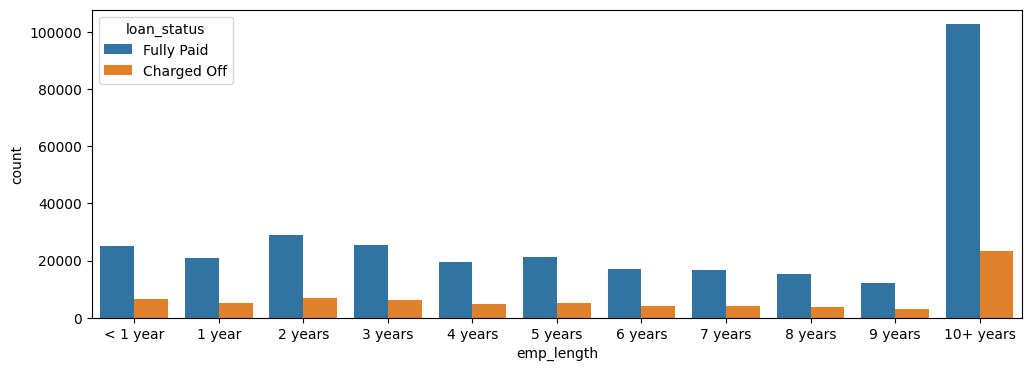

In [53]:
plt.figure(figsize=(12,4))
sns.countplot(x='emp_length', data=df, order=emp_length_order, hue= "loan_status") # Majority of the loans are paid back and 10+ years of employment is the most common

In [54]:
emp_co =  df[df['loan_status']=='Charged Off'].groupby('emp_length').count()['loan_status'] # number of charged off loans for each employment length

In [55]:
emp_fp = df[df['loan_status']=='Fully Paid'].groupby('emp_length').count()['loan_status'] # number of fully paid loans for each employment length

In [56]:
emp_co/emp_fp # ratio of charged off to fully paid loans for each employment length

emp_length
1 year       0.248649
10+ years    0.225770
2 years      0.239560
3 years      0.242593
4 years      0.238213
5 years      0.237911
6 years      0.233341
7 years      0.241887
8 years      0.249625
9 years      0.250735
< 1 year     0.260830
Name: loan_status, dtype: float64

In [57]:
# Charged off loans are not that much different for each employment length, so we can drop this column
df = df.drop('emp_length', axis=1)

In [58]:
# check for missing values
df.isnull().sum() 

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1756
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

In [61]:
df['purpose'].head(10) # check for unique values in purpose


0              vacation
1    debt_consolidation
2           credit_card
3           credit_card
4           credit_card
5    debt_consolidation
6      home_improvement
7           credit_card
8    debt_consolidation
9    debt_consolidation
Name: purpose, dtype: object

In [62]:
df['title'].head(10) # The title column is redundant with the purpose column, so we can drop this column

0                   Vacation
1         Debt consolidation
2    Credit card refinancing
3    Credit card refinancing
4      Credit Card Refinance
5         Debt consolidation
6           Home improvement
7       No More Credit Cards
8         Debt consolidation
9         Debt Consolidation
Name: title, dtype: object

In [63]:
df = df.drop('title', axis=1)

In [ ]:
# How we can fill the missing values in mort_acc column
numeric_df = df.select_dtypes(include=['float64', 'int64']) # select only numeric columns

correlation = numeric_df.corr()['mort_acc'].sort_values() # check for correlation with mort_acc column

print(correlation)  # total_acc has the highest correlation with mort_acc

int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
mort_acc                1.000000
Name: mort_acc, dtype: float64


In [ ]:
total_acc_avg = df.groupby('total_acc').agg({'mort_acc': 'mean'})['mort_acc'] # average mort_acc for each total_acc value

In [74]:
def fill_mort_acc(total_acc, mort_acc):
    if np.isnan(mort_acc):
        return total_acc_avg[total_acc]
    else:
        return mort_acc

In [ ]:
df["mort_acc"] = df.apply(lambda x: fill_mort_acc(x['total_acc'], x['mort_acc']), axis=1) # fill the missing values in mort_acc column